# LDDMM: how to visualize regression results?

In [1]:
from pathlib import Path

import pyvista as pv
from IPython.display import Image

from polpo.preprocessing import Map, Sorter
from polpo.preprocessing.mesh.io import PvReader
from polpo.preprocessing.path import FileFinder, IsFileType, PathShortener
from polpo.preprocessing.str import DigitFinder

In [2]:
STATIC_VIZ = True

if STATIC_VIZ:
    pv.set_jupyter_backend("static")

In [3]:
OUTPUTS_DIR = Path("results") / "regression"

## Brain changes over time

In [13]:
meshes_reader = (
    FileFinder(
        OUTPUTS_DIR,
        rules=[IsFileType("vtk"), lambda x: "shape" in x],
    )
    + Sorter(key=PathShortener() + DigitFinder(index=0))
    + Map(PvReader())
)

meshes = meshes_reader()

In [14]:
gif_name = OUTPUTS_DIR / "regression.gif"

pl = pv.Plotter(notebook=False, off_screen=True)

pl.open_gif(gif_name.as_posix())

pl.add_mesh(meshes[0], show_edges=True)
pl.write_frame()

for mesh in meshes[1:]:
    pl.update_coordinates(mesh.points, render=False)
    pl.write_frame()

pl.close()

/home/luisfpereira/miniconda3/lib/python3.11/site-packages/pyvista/plotting/plotter.py:4722: PyVistaDeprecationWarning: This method is deprecated and will be removed in a future version of PyVista. Directly modify the points of a mesh in-place instead.
  warnings.warn(


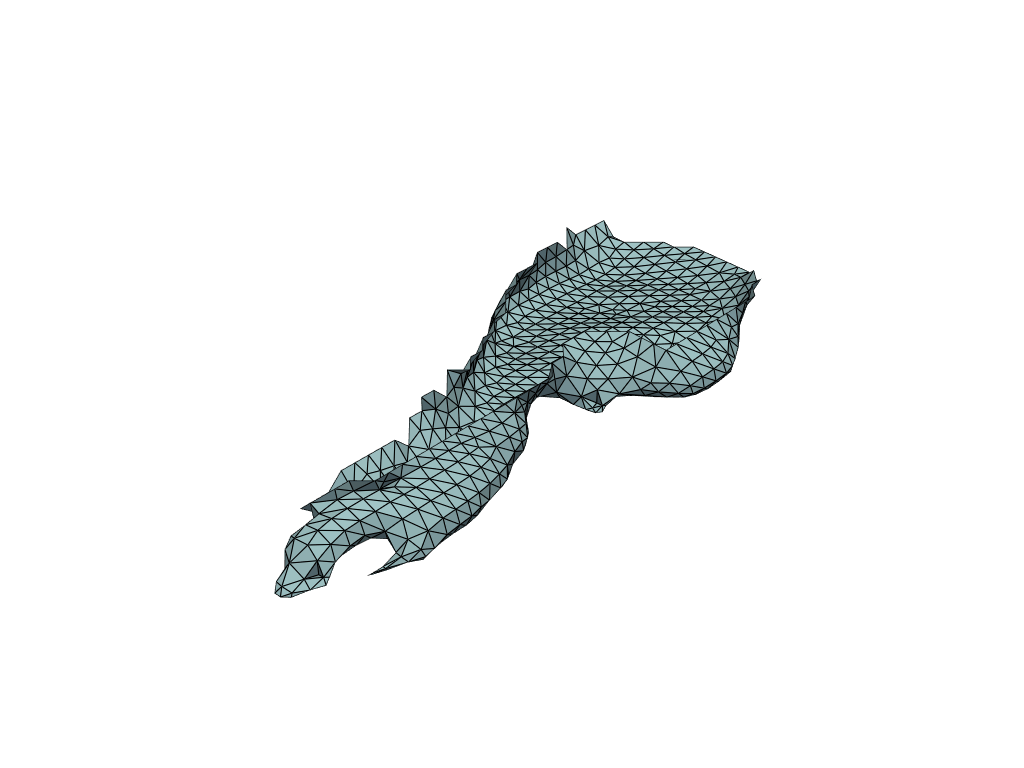

In [15]:
Image(open(gif_name, "rb").read())